# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B/CLV.csv")

In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
MLPRegressor?

In [11]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (20,5,), (10,5), (5,), (15, 2, 1,)], 
    "activation" : ['relu','logistic'],
    # "alpha" : [0.01, 0.001]
}

In [12]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20, 5), (10, 5), (5,),
                                                (15, 2, 1)]})

In [13]:
print(grid.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (20, 5)}


# 3.) Train a model with the optimal solution from GridSearch

In [14]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(20, 5))

In [15]:
regr = MLPRegressor(**grid.best_params_).fit(X_train, y_train)

In [16]:
# p_dict = {
#     "hidden_layer_sizes": (10,), 
#     "activation" : 'relu'
# }

# MLPRegressor(**p_dict)

#=======EQUIVALENT TO========

# MLPRegressor(hidden_layer_sizes = (10,), 
#              activation = "relu")

# 4.) What are the in-sample and out of sample MSEs

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
pred_in = regr.predict(X_train)
pred_out = regr.predict(X_test)

mse_in = np.mean((np.array(pred_in) - np.array(y_train))**2)
mse_out = np.mean((np.array(pred_out) - np.array(y_test))**2)

print("In-sample MSE: ", mse_in)
print("Out-of-sample MSE: ", mse_out)

In-sample MSE:  43789870.31305864
Out-of-sample MSE:  45249610.47828459


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [19]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(20, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(5, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(1, activation = "relu"))
model.compile(loss = "mse", optimizer=Adam(lr=0.01))
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 101224480.0000
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 51423524.0000
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 44617704.0000
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 43769700.0000
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 43457740.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 43300260.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 43189796.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 43120756.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 43066572.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 43023148.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 42957120.0000
Epoch 12/100
200/2

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [21]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=74c8bead3e57f830b51bbc06cf0a64a4053d2aa9cd58f3d8dfbbb90d8d34d163
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [22]:
from tensorflow.keras.utils import plot_model
from ann_visualizer.visualize import ann_viz;

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


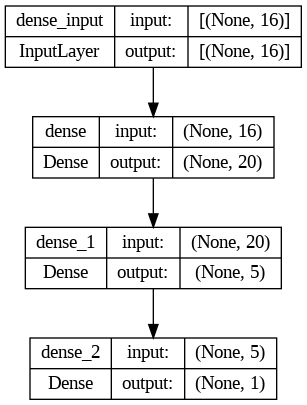

In [24]:
plot_model(model, show_shapes = True)

In [25]:
ann_viz(model,title = "CLV NN Visualization", view=True, filename='/content/gdrive/MyDrive/ECON 441B/network.gv')

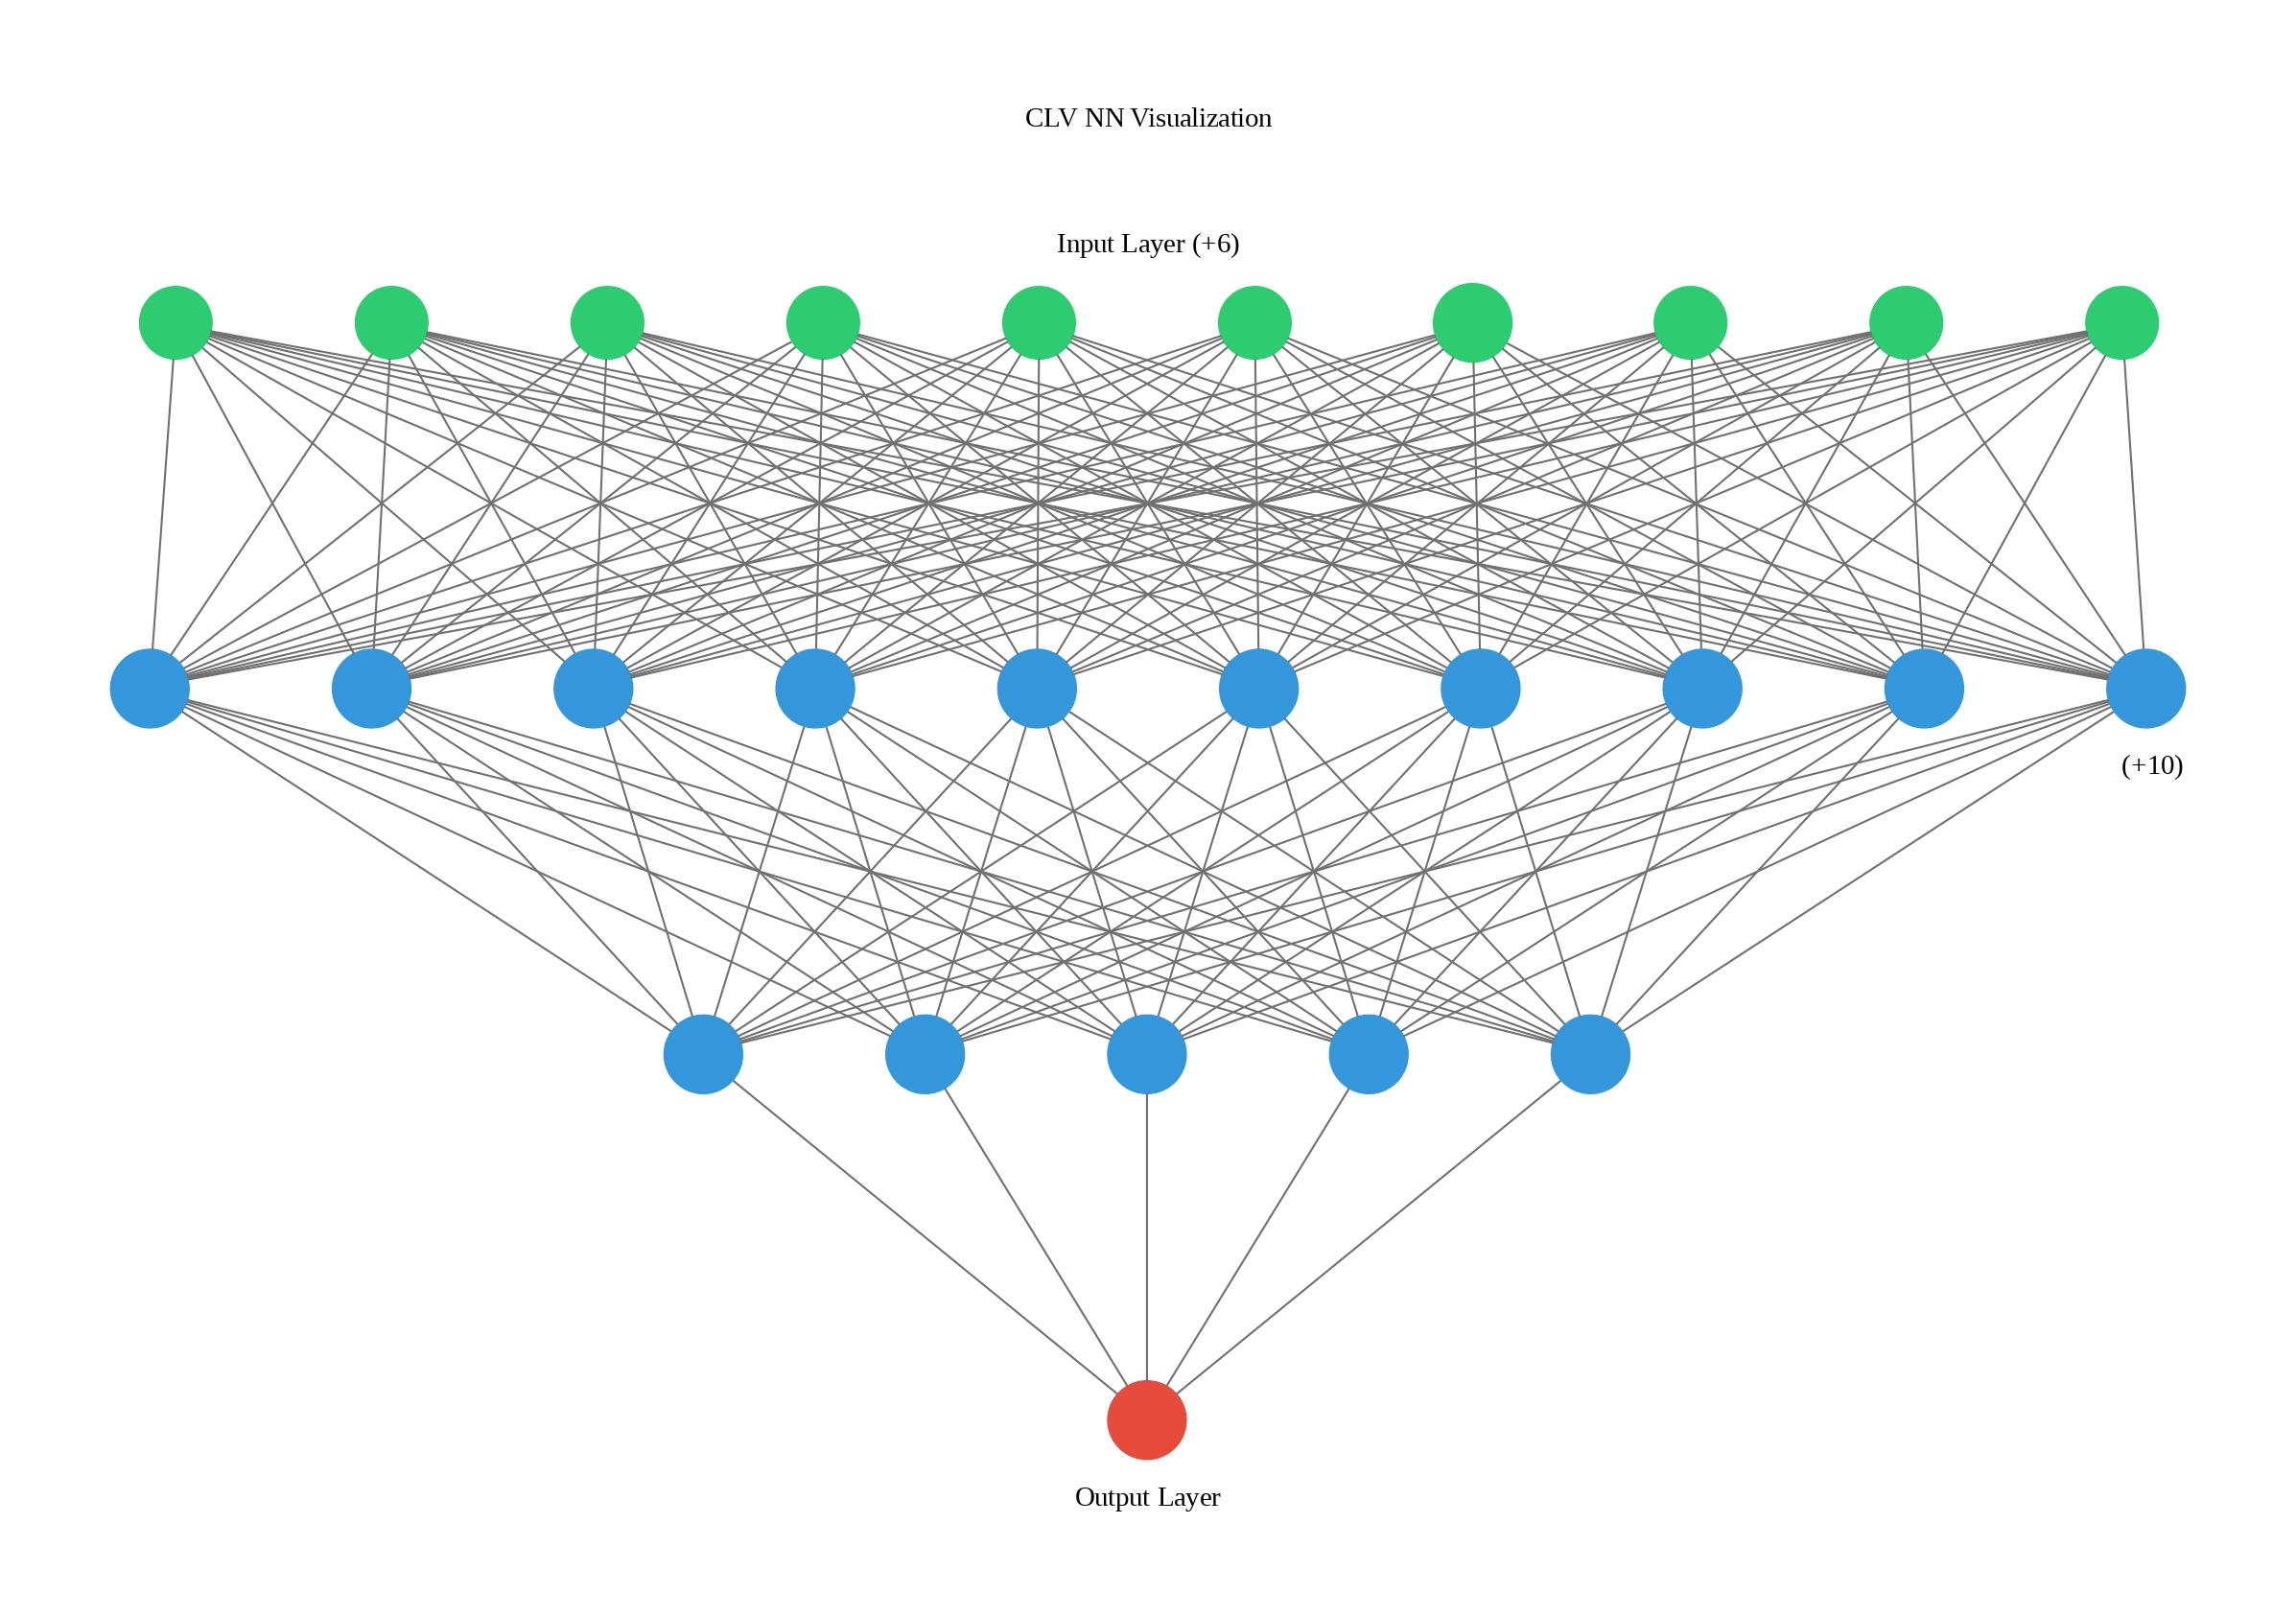